## Market Basket Analysis USING APRIORI

In [2]:
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df.head()
'''
The dataset doesnot have any header. Thus we have used header = None. Otherwise, the first row will be dispalyed as a header row.
Let us check the rows, columns in the dataset along with the null values and type of columns.
'''


'\nThe dataset doesnot have any header. Thus we have used header = None. Otherwise, the first row will be dispalyed as a header row.\nLet us check the rows, columns in the dataset along with the null values and type of columns.\n'

In [4]:
# number of rows, columns
df.shape

(7501, 20)

In [5]:
# number of null values in each column
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [6]:
# type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#converting dataframe into list of lists
dataframe_list=[]

# values of range is according to the number of rows and columns
for i in range(0,7501):
    dataframe_list.append([str(df.values[i,j]) for j in range(0,20)])

dataframe_list[:2]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

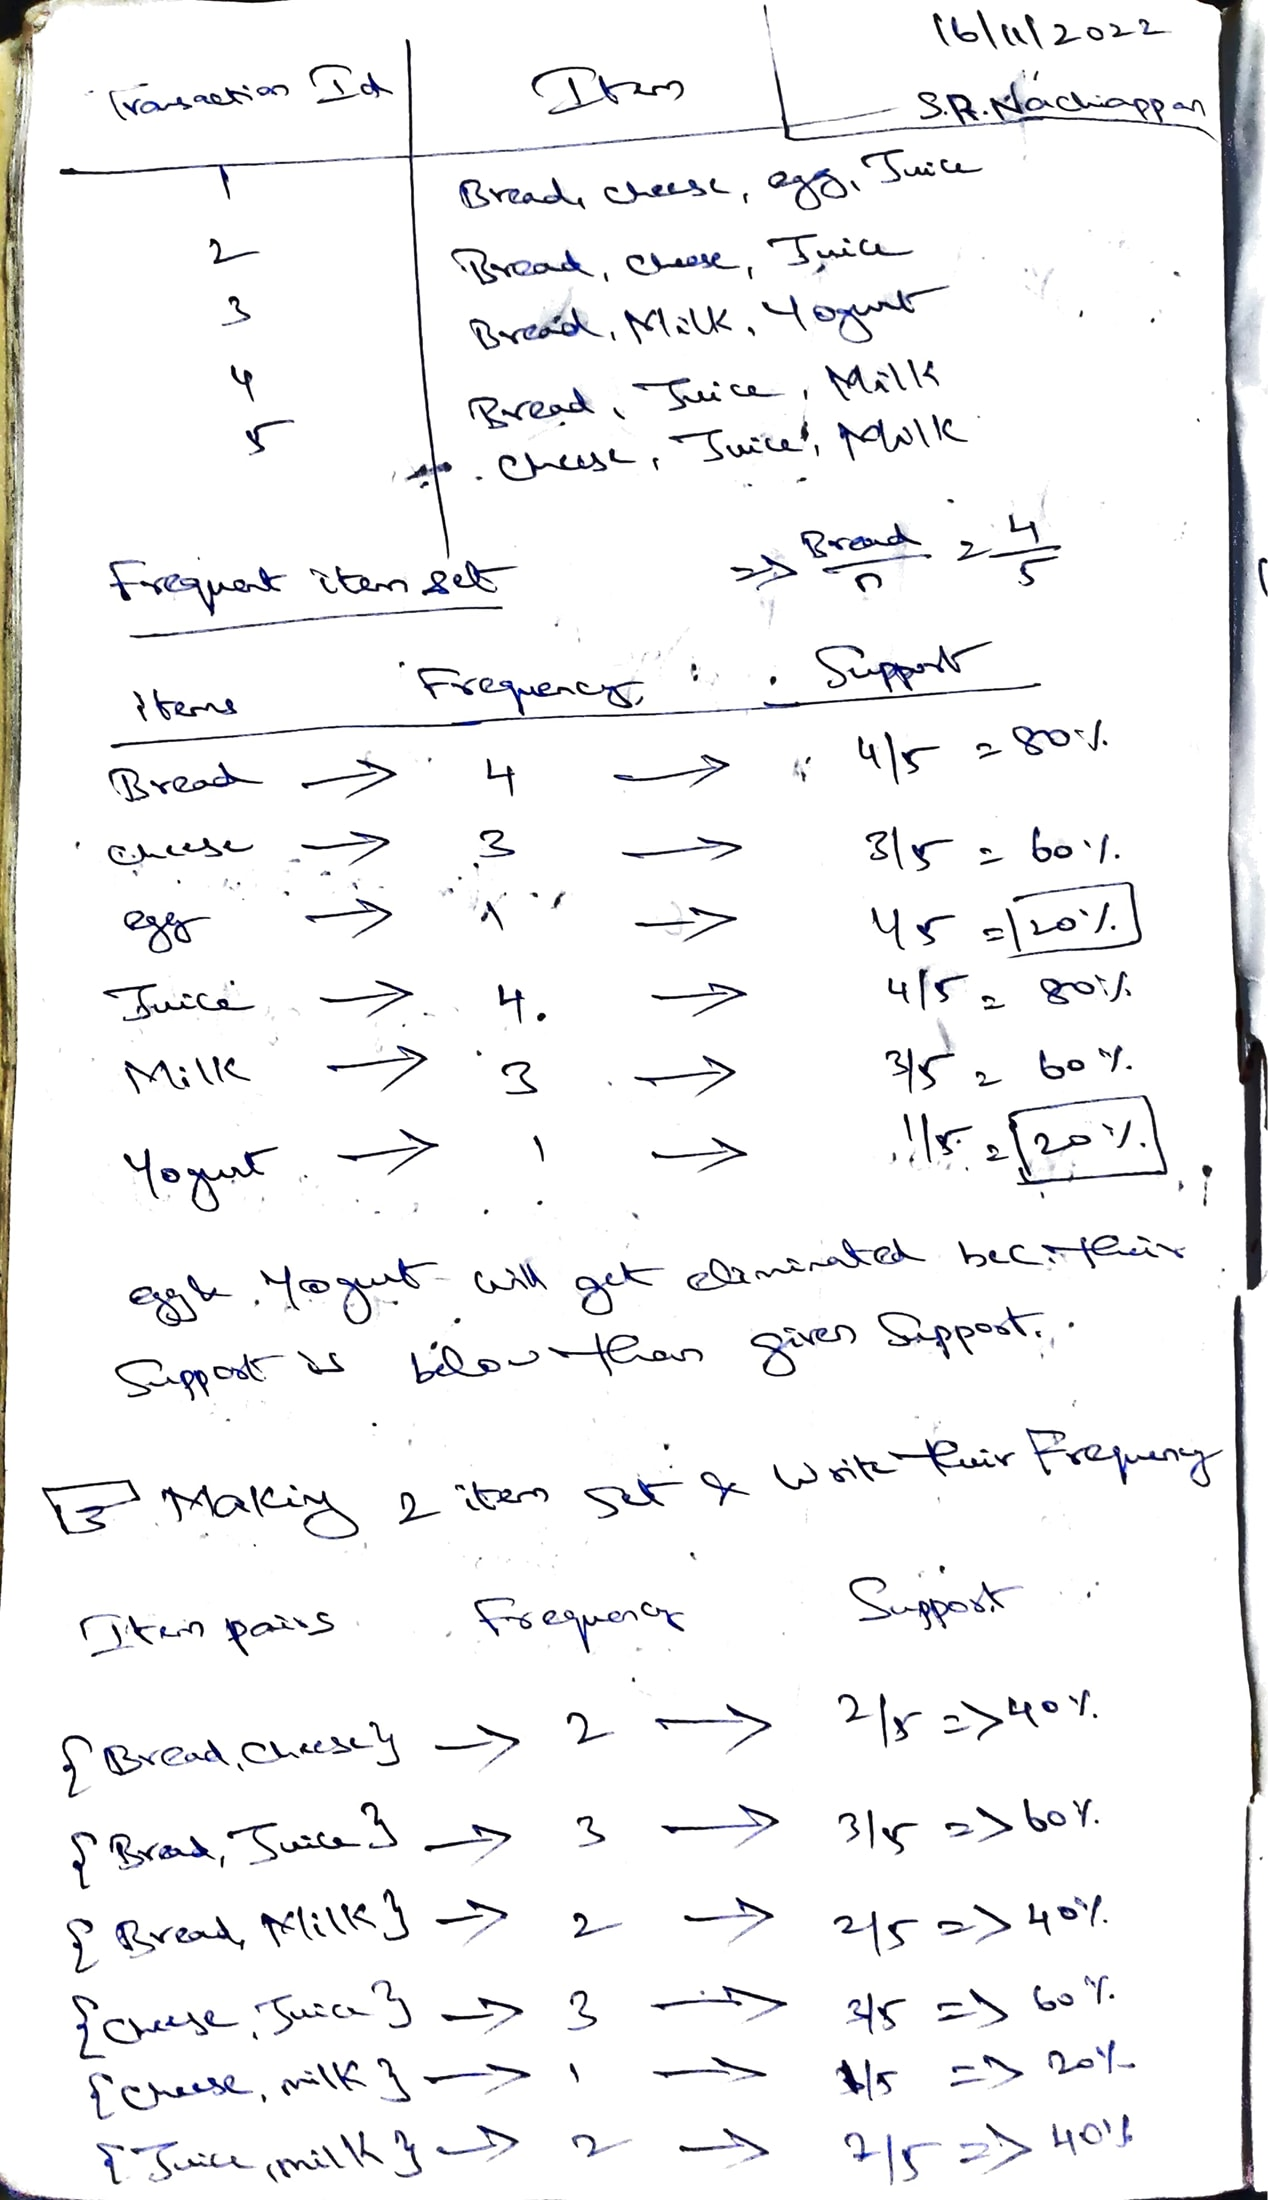

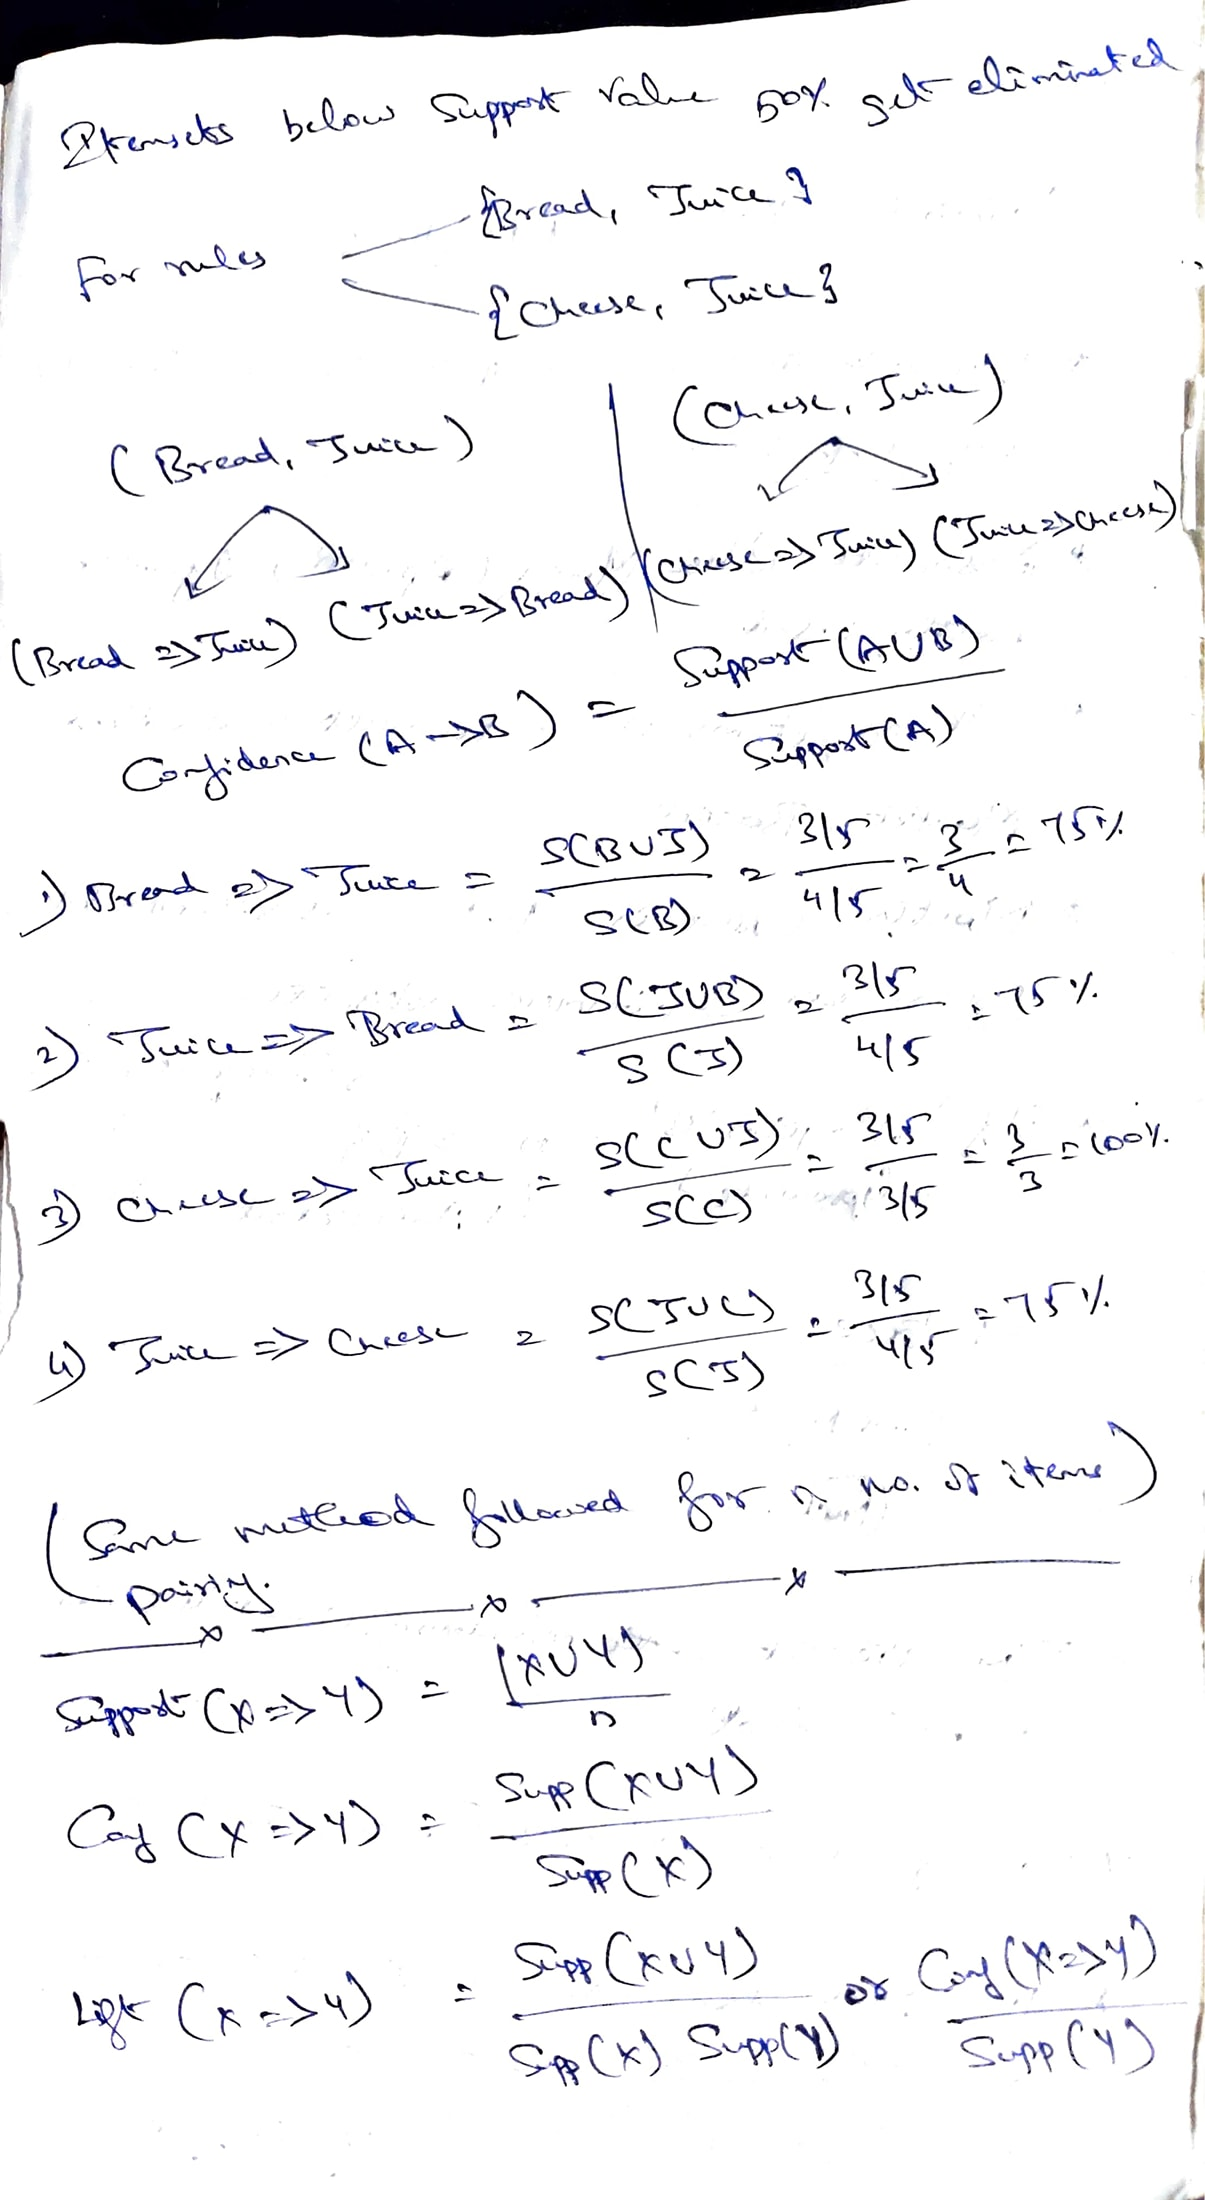

In [9]:
#applying apriori algorithm
association_rules = apriori(dataframe_list,min_support=0.0045, min_confidence=0.4,
                            min_lift=1.2, min_length=2)
association_results = list(association_rules)

In [14]:
association_results[:5]

[RelationRecord(items=frozenset({'extra dark chocolate', 'mineral water'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'extra dark chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.47777777777777775, lift=2.0043686303753416)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040927876283162246, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7475215442008991)]),
 RelationRecord(items=frozenset({'light cream', 'mineral water'}), support=0.007332355685908546, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'mineral water'}), confidence=0.4700854700854701, lift=1.9720979368630376)]),
 RelationRecord(items=frozenset({'nonfat milk', 'mineral water'}), support=0.005065991201173177, ordered_statistics=[OrderedStatistic(items_base=frozenset({'nonfat 

In [11]:
Rule = []
Support = []
Confidence = []
Lift = []
for item in association_results:
    Rule.append(item[0])
    Support.append(str(item[1]))
    Confidence.append(str(item[2][0][2]))
    Lift.append(str(item[2][0][3]))


In [12]:
dict = {'Rule': Rule, 'Support': Support, 'Confidence': Confidence, "Lift": Lift} 

In [13]:
d = pd.DataFrame(dict)
d

,Rule,Support,Confidence,Lift
0,"(extra dark chocolate, mineral water)",0.005732568990801226,0.47777777777777775,2.0043686303753416
1,"(mineral water, ground beef)",0.040927876283162246,0.41655359565807326,1.7475215442008991
2,"(light cream, mineral water)",0.007332355685908546,0.4700854700854701,1.9720979368630376
3,"(nonfat milk, mineral water)",0.005065991201173177,0.4871794871794871,2.0438105891126024
4,"(olive oil, mineral water)",0.027596320490601255,0.4190283400809717,1.7579035676439423
...,...,...,...,...
215,"(spaghetti, whole wheat rice, nan, mineral water)",0.006265831222503666,0.4433962264150943,1.8611724086959274
216,"(spaghetti, pancakes, nan, olive oil)",0.005065991201173177,0.4691358024691358,2.6944775301079535
217,"(spaghetti, chocolate, eggs, nan, mineral water)",0.004532728969470737,0.43037974683544306,1.8065352439914149
218,"(spaghetti, chocolate, milk, nan, mineral water)",0.004932675643247567,0.451219512195122,1.8940109462650307
